# Systemes Decisionnels & Data-Mining
## **Atelier 1 : Regression Logistique**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Recuperer des donnees a partir de chier advertising.scv et decouvrir ses principales caracteristiques.

In [5]:
data = pd.read_csv('advertising.csv')
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


### 2. Initialiser X (predictors, variable independante) par la variable TV et y (cible, variable dependante).

In [6]:
X = data[['TV']]
y = data['Sales']

### 3. Pourquoi il s'agit d'un probleme de regression

Il s'agit d'un problème de régression car nous cherchons à prédire une variable continue (Sales) en fonction d'une autre variable (TV).

### 4. Visualiser la base de donnees avec matplotlib.

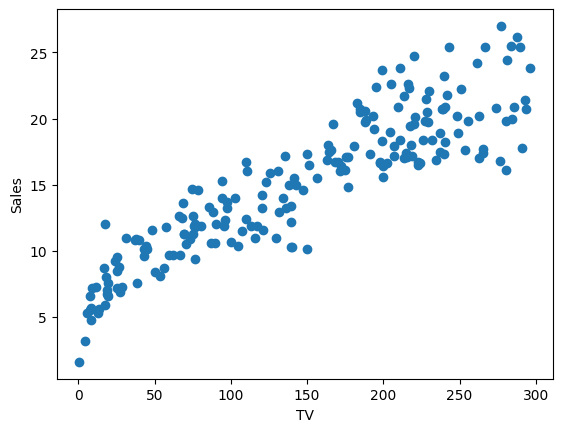

In [7]:
plt.scatter(X, y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

### 5. Soit le modele de regression lineaire simple definit par
**𝑦 = 𝑤0 + 𝑤1𝑥**

#### - a l'aide de train test split de sklearn.model selection, diviser la base de donnees en base d'apprentissage et base de test (80% pour la base d'apprentissage et 20% pour la base de test )

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### - Defnir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur theorique et la valeur reelle.

In [9]:
def MSE(X, y, W):
    y_pred = X.dot(W)
    return ((y - y_pred) ** 2).mean()

#### - Definir la fonction Gradient(X,y,W).

In [10]:
def Gradient(X, y, W):
    return -2 * X.T.dot(y - X.dot(W)) / len(y)

#### - Etablir une fonction de mise a jour des parametres W MiseJour(grad,W,alpha).

In [12]:
def MiseJour(grad, W, alpha):
    return W - alpha * grad

#### - Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps), qui retourne les meilleurs parametres estimes et de plus ache l'evolution de MSE apres chaque iteration.

In [18]:
def Batch_Gradient_Descent(X, y, W, N_max, alpha, eps):
    mse_values = []
    for _ in range(N_max):
        grad = Gradient(X, y, W)
        W = MiseJour(grad, W, alpha)
        mse = MSE(X, y, W)
        mse_values.append(mse)
        if mse < eps:
            break
    return W, mse_values
W_initial = np.zeros((X_train.shape[1]))
W_optimal, mse_values = Batch_Gradient_Descent(X_train, y_train, W_initial, N_max=1000, alpha=0.1, eps=0.001)

#### - Tracer l'MSE.

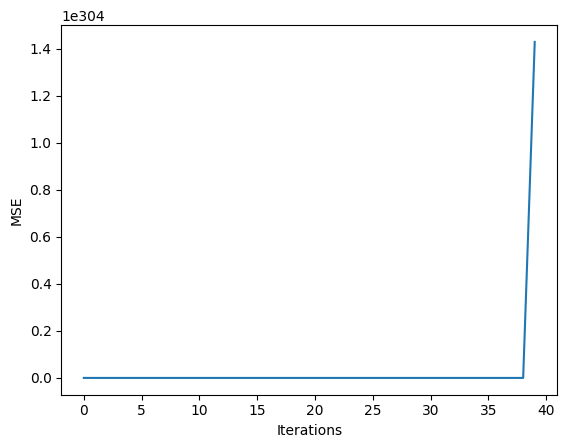

In [19]:
plt.plot(mse_values)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

#### - Donner l'erreur de ce modele.

In [20]:
final_mse = MSE(X_test, y_test, W_optimal)
print(f'Erreur MSE finale sur l\'ensemble de test : {final_mse}')

Erreur MSE finale sur l'ensemble de test : nan
